1. IMPORT AND INSTALL DEPENDENCIES

In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib nltk gtts

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2. KEYPOINTS USING MP HOLISTIC

In [3]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color Conversion BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # make predictions
    image.flags.writeable = True                   # Image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color Conversion RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) #draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(48,206,117), thickness=1, circle_radius=1), 
                              mp_drawing.DrawingSpec(color=(48,164,88), thickness=1, circle_radius=1)
                             )
    #draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    #draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(121,44,220), thickness=2, circle_radius=2)
                             ) 
    #draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,0), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(245,90,230), thickness=2, circle_radius=2)
                             ) 
#draw right hand connections

In [11]:
cap = cv2.VideoCapture(0)
# Set mediapipe model       #change to make detection confidence higher  #change to make tracking confidence higher
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
    
        #Read feed
        ret, frame = cap.read()

        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #Draw landmarks
        draw_styled_landmarks(image, results)
        
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
    
        #Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
draw_landmarks(frame, results)

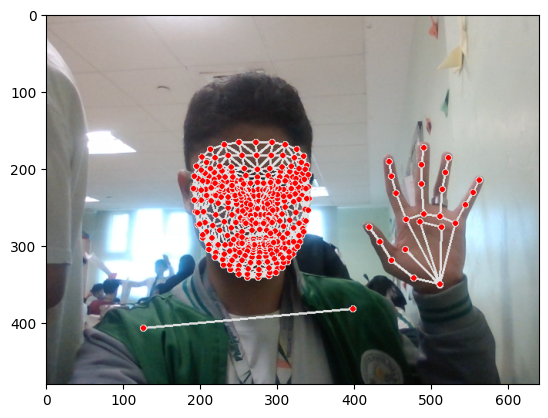

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. IMPORT AND INSTALL DEPENDENCIES

In [14]:
len(results.left_hand_landmarks.landmark)

21

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.42938662,  0.5267216 , -0.65833092, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.42938662,  0.5267216 , -0.65833092, ...,  0.        ,
        0.        ,  0.        ])

4. SETUP FOLDERS FOR COLLECTION

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'how are you', 'thank you', 'im fine'])

# 30 videos worth of data
no_sequences = 30

#Videos are going to be 30 frames in length
sequence_length = 60

#Folder start
start_folder = 0

5. COLLECT KEYPOINT VALUES FOR TRAINING AND TESTING

In [80]:
cap = cv2.VideoCapture(0)
# Set mediapipe model       #change to make detection confidence higher  #change to make tracking confidence higher
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    #New loop
    #loop through actions
    for action in actions:
        #loop through sequences aka vids
        for sequence in range(start_folder, start_folder+no_sequences):
            #loop through vid length aka sequence length
            for frame_num in range(sequence_length):
    
                #Read feed
                ret, frame = cap.read()
                
                #Make detections
                image, results = mediapipe_detection(frame, holistic)
        
                #Draw landmarks
                draw_styled_landmarks(image, results)

                #New Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #Show to screen
                    cv2.imshow('OpenCV Feed', image)

                #New Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                #Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [81]:
cap.release()
cv2.destroyAllWindows()

6. PREPROCESS DATA AND CREATE LABELS AND FEATURES

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
label_map

{'hello': 0, 'how are you': 1, 'thank you': 2, 'im fine': 3}

In [26]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
np.array(sequences).shape

(120, 60, 1662)

In [28]:
np.array(labels).shape

(120,)

In [29]:
X = np.array(sequences)

In [30]:
X.shape

(120, 60, 1662)

In [27]:
y = to_categorical(labels).astype(int)

NameError: name 'to_categorical' is not defined

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [35]:
X_test.shape

(60, 60, 1662)

In [36]:
y_test.shape

(60, 4)

7. BUILD AND TRAIN LSTM NEURAL NETWORK

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [33]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [34]:
res = [0.7, 0.2, 0.1]

In [35]:
actions[np.argmax(res)]

'hello'

In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [37]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [107]:

# Define the initial learning rate
initial_learning_rate = 0.01

# Define the learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate,  # Initial learning rate
    decay_steps=10000,       # Learning rate decay steps
    decay_rate=0.9           # Learning rate decay rate
)

# Create the optimizer with the learning rate schedule
optimizer = SGD(learning_rate=lr_schedule)

# Compile your model with this optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Now, you can use model.fit with this optimizer
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.05)


Epoch 1/50
2/2 [==============================] - 4s 576ms/step - loss: 1.3736 - categorical_accuracy: 0.2719 - val_loss: 1.3067 - val_categorical_accuracy: 0.6667
Epoch 2/50
2/2 [==============================] - 0s 180ms/step - loss: 1.3736 - categorical_accuracy: 0.2719 - val_loss: 1.3069 - val_categorical_accuracy: 0.6667
Epoch 3/50
2/2 [==============================] - 0s 183ms/step - loss: 29134381056.0000 - categorical_accuracy: 0.2456 - val_loss: nan - val_categorical_accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 179ms/step - loss: nan - categorical_accuracy: 0.2281 - val_loss: nan - val_categorical_accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 184ms/step - loss: nan - categorical_accuracy: 0.2281 - val_loss: nan - val_categorical_accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 185ms/step - loss: nan - categorical_accuracy: 0.2281 - val_loss: nan - val_categorical_accuracy: 0.0000e+00
Epoch 7/50


In [114]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.05)

Epoch 1/50
2/2 [==============================] - 4s 549ms/step - loss: 1.5925 - categorical_accuracy: 0.2281 - val_loss: 2.4403 - val_categorical_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 177ms/step - loss: 6.3766 - categorical_accuracy: 0.3070 - val_loss: 65.8471 - val_categorical_accuracy: 0.1667
Epoch 3/50
2/2 [==============================] - 0s 182ms/step - loss: 71.6813 - categorical_accuracy: 0.2281 - val_loss: 137.9860 - val_categorical_accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 174ms/step - loss: 75.5275 - categorical_accuracy: 0.2895 - val_loss: 84.2475 - val_categorical_accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 179ms/step - loss: 76.3715 - categorical_accuracy: 0.3333 - val_loss: 18.0854 - val_categorical_accuracy: 0.6667
Epoch 6/50
2/2 [==============================] - 0s 176ms/step - loss: 93.0092 - categorical_accuracy: 0.2018 - val_loss: 201.9562 - val_categorical_accuracy: 

In [139]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
2/2 [==============================] - 0s 75ms/step - loss: 1.4754 - categorical_accuracy: 0.3500
Epoch 2/100
2/2 [==============================] - 0s 58ms/step - loss: 1.6245 - categorical_accuracy: 0.3667
Epoch 3/100
2/2 [==============================] - 0s 62ms/step - loss: 1.7054 - categorical_accuracy: 0.3167
Epoch 4/100
2/2 [==============================] - 0s 62ms/step - loss: 1.5600 - categorical_accuracy: 0.3500
Epoch 5/100
2/2 [==============================] - 0s 60ms/step - loss: 1.6771 - categorical_accuracy: 0.4333
Epoch 6/100
2/2 [==============================] - 0s 62ms/step - loss: 1.3814 - categorical_accuracy: 0.4167
Epoch 7/100
2/2 [==============================] - 0s 60ms/step - loss: 1.6433 - categorical_accuracy: 0.4167
Epoch 8/100
2/2 [==============================] - 0s 67ms/step - loss: 1.5028 - categorical_accuracy: 0.4333
Epoch 9/100
2/2 [==============================] - 0s 60ms/step - loss: 1.4067 - categorical_accuracy: 0.4500
Epoch 10/1

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596708 (2.28 MB)
Trainable params: 596708 

8. MAKE PREDICTIONS

In [44]:
res = model.predict(X_test)

NameError: name 'X_test' is not defined

In [45]:
actions[np.argmax(res[1])]

'hello'

In [46]:
actions[np.argmax(y_test[0])]

NameError: name 'y_test' is not defined

9. SAVE WEIGHTS

In [145]:
model.save('action.h5')

In [48]:
del model

In [38]:
model.load_weights('action.h5')

10. EVALUATION USING CONFUSION MATRIX AND ACCURACY

In [39]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [50]:
yhat = model.predict(X_train)

ValueError: in user code:

    File "C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 30, 1662), found shape=(None, 60, 1662)


In [148]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [149]:
ytrue

[3,
 3,
 1,
 3,
 2,
 1,
 0,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 2,
 3,
 3,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 3,
 3,
 2,
 0,
 0,
 1,
 3,
 0,
 1,
 0,
 2,
 0,
 3,
 1,
 1,
 0,
 2,
 2,
 3,
 2,
 1,
 3,
 2,
 3,
 1,
 3,
 2,
 3,
 0,
 1,
 3,
 1]

In [150]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[46,  3],
        [ 0, 11]],

       [[41,  2],
        [ 9,  8]],

       [[31, 16],
        [ 2, 11]],

       [[40,  1],
        [11,  8]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

NameError: name 'ytrue' is not defined

11. TEST IN REAL TIME

In [44]:
from scipy import stats

colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), +num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 4, cv2.LINE_AA)

    return output_frame

In [40]:
import cv2
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (215, 171, 163)]
count = 0
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    if isinstance(res, float):
        res = [res]  # Convert a single probability to a list for consistency
    
    num_rectangles = min(len(res), 4)  # Display only 4 rectangles at most
    for num in range(num_rectangles):
        prob = res[num]
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[min(num, len(colors) - 1)], -1)
        cv2.putText(output_frame, actions[min(num, len(actions) - 1)], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    return output_frame


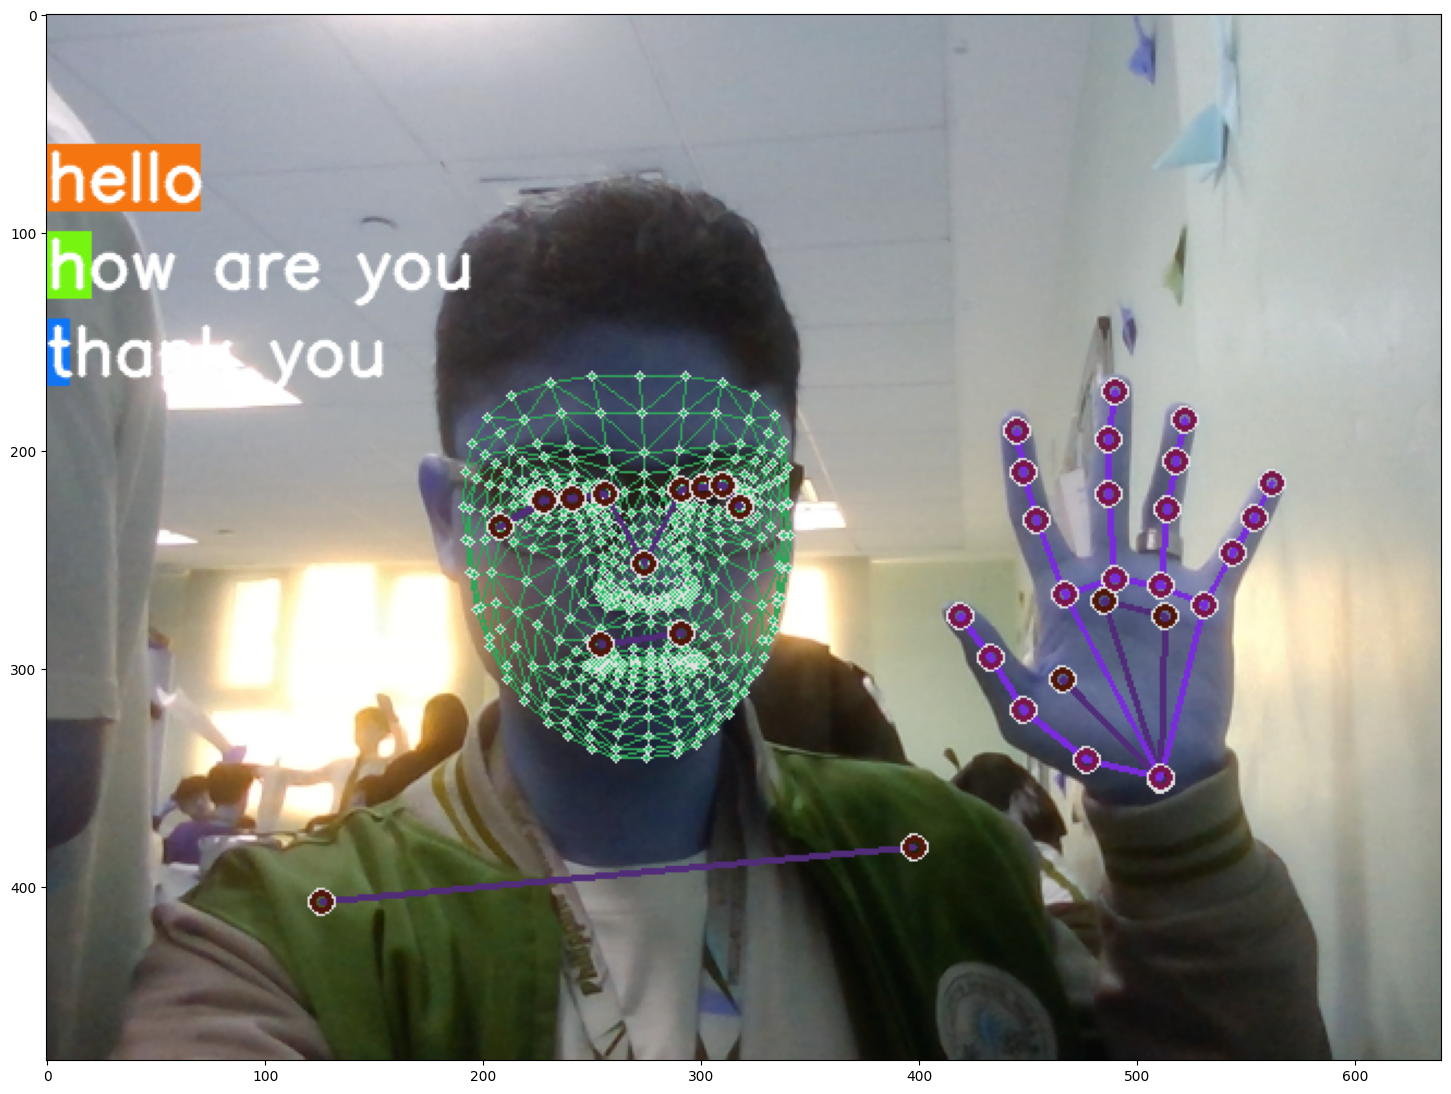

In [41]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [57]:
!pip install gTTS pygame

In [58]:
from gtts import gTTS
import pygame

# Initialize the pygame mixer
pygame.mixer.init()

pygame 2.5.1 (SDL 2.28.2, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [59]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.6

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        # Modify your prediction logic to ensure `res` is a list of probabilities
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0].tolist()  # Convert to list
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 4: 
                sentence = sentence[-4:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

TypeError: 'float' object is not subscriptable

In [181]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))

------------ WIP CODE -----------

In [156]:
!pip install pyttsx3


  Obtaining dependency information for comtypes from https://files.pythonhosted.org/packages/c2/a7/fe4bd49b5c4afa7a7ed3852abda6909e48c00715e6a134e47055381113aa/comtypes-1.2.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/184.3 kB ? eta -:--:--
   -------- ------------------------------ 41.0/184.3 kB 960.0 kB/s eta 0:00:01
   -------- ------------------------------ 41.0/184.3 kB 960.0 kB/s eta 0:00:01
   -------- ------------------------------ 41.0/184.3 kB 960.0 kB/s eta 0:00:01
   -------- ------------------------------ 41.0/184.3 kB 960.0 kB/s eta 0:00:01
   -------- ------------------------------ 41.0/184.3 kB 960.0 kB/s eta 0:00:01
   -------- ------------------------------ 41.0/184.3 kB 960.0 kB/s eta 0:00:01
   -------------------------------------- 184.3/184.3 kB 586.1 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\franc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [43]:
import cv2
import mediapipe as mp
import numpy as np
from gtts import gTTS
import threading
from queue import Queue
import pyttsx3
import time

# Initialize OpenCV VideoCapture
cap = cv2.VideoCapture(0)

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize text-to-speech engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)  # You can adjust the speaking rate (words per minute)

# Initialize variables for controlling the timing of text-to-speech
speak_delay = 5  # Delay in seconds

# Initialize a thread-safe queue for text-to-speech requests
speech_queue = Queue()

# Function to handle text-to-speech
def text_to_speech_worker():
    while True:
        text_to_display = speech_queue.get()
        if text_to_display:
            engine.say(text_to_display)
            engine.runAndWait()
            time.sleep(speak_delay)  # Add a delay before displaying the next text
        speech_queue.task_done()

# Start the text-to-speech thread
tts_thread = threading.Thread(target=text_to_speech_worker)
tts_thread.daemon = True
tts_thread.start()

current_word_index = 0
words_to_display = ['hello', 'how are you', 'thank you', 'im fine']

# Other variables
sequence = []
actions = np.array(['hello', 'how are you', 'thank you', 'im fine'])
sentence = []
predictions = []
threshold = 0.6
last_action = None

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # Perform holistic detection
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        image, results = mediapipe_detection(frame, holistic)
    
   # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

    # Modify your prediction logic to ensure `res` is a list of probabilities
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0].tolist()
        action = actions[np.argmax(res)]
        print(action)
        predictions.append(action)

        if np.unique(predictions[-10:])[0] == action:
            if res[np.argmax(res)] > threshold:
                if last_action != action:
                    sentence.append(action)
                    last_action = action

        if len(sentence) > 4:
            sentence = sentence[-4:]
            
            # Check if it's time to change the displayed word
        if current_word_index < len(words_to_display):
            text_to_display = words_to_display[current_word_index]
            speech_queue.put(text_to_display)
            current_word_index += 1
        
        # Visualize the probabilities and display the sentence on the OpenCV frame
        image = prob_viz(res, actions, image, colors)
        text_to_display = ' '.join(sentence)
        speech_queue.put(text_to_display)
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, text_to_display, (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

      #  # Play audio if there is new text to be spoken
      #  if text_to_display:
      #     engine.say(text_to_display)
      #      engine.runAndWait()
       #     time.sleep(speak_delay)  # Add a delay before displaying the next text


    cv2.imshow('OpenCV Feed', image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Exception in thread Thread-8 (text_to_speech_worker):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\franc\AppData\Local\Temp\ipykernel_18300\4058194906.py", line 35, in text_to_speech_worker
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\queue.py", line 75, in task_done
    raise ValueError('task_done() called too many times')
ValueError: task_done() called too many times


1/1 [==============================] - 0s 28ms/step
im fine
1/1 [==============================] - 0s 26ms/step
im fine
1/1 [==============================] - 0s 30ms/step
im fine
1/1 [==============================] - 0s 32ms/step
im fine
1/1 [==============================] - 0s 36ms/step
im fine
1/1 [==============================] - 0s 44ms/step
im fine
1/1 [==============================] - 0s 32ms/step
im fine
1/1 [==============================] - 0s 32ms/step
im fine
1/1 [==============================] - 0s 17ms/step
how are you
1/1 [==============================] - 0s 22ms/step
im fine
1/1 [==============================] - 0s 31ms/step
thank you
1/1 [==============================] - 0s 16ms/step
im fine
1/1 [==============================] - 0s 31ms/step
how are you
1/1 [==============================] - 0s 16ms/step
im fine
1/1 [==============================] - 0s 32ms/step
how are you
1/1 [==============================] - 0s 32ms/step
im fine
1/1 [=====================

In [2]:
cap.release()
cv2.destroyAllWindows()

In [61]:
import cv2
import mediapipe as mp
import numpy as np
from gtts import gTTS
import threading
from queue import Queue
import pyttsx3
import time

# Initialize OpenCV VideoCapture
cap = cv2.VideoCapture(0)

# Other variables
frame_count = 0
frame_skip = 1
new_width, new_height = 640, 480  # Adjust as needed

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize text-to-speech engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)  # You can adjust the speaking rate (words per minute)

# Initialize variables for controlling the timing of text-to-speech
speak_delay = 5  # Delay in seconds

# Initialize a thread-safe queue for text-to-speech requests
speech_queue = Queue()

# Function to handle text-to-speech
def text_to_speech_worker():
    while True:
        text_to_display = speech_queue.get()
        if text_to_display:
            engine.say(text_to_display)
            engine.runAndWait()
            # Remove the time.sleep(5) if you want continuous display
        speech_queue.task_done()

# Start the text-to-speech thread
tts_thread = threading.Thread(target=text_to_speech_worker)
tts_thread.daemon = True
tts_thread.start()

current_word_index = 0
words_to_display = ['hello', 'how are you', 'thank you', 'im fine']

# Other variables
sequence = []
actions = np.array(['hello', 'how are you', 'thank you', 'im fine'])
sentence = []
predictions = []
threshold = 0.6
last_action = None

# Initialize text-to-speech engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)

# Initialize a thread-safe queue for text-to-speech requests
speech_queue = Queue()

# Function to handle text-to-speech
def text_to_speech_worker():
    while True:
        text_to_display = speech_queue.get()
        if text_to_display:
            engine.say(text_to_display)
            engine.runAndWait()
            # Sleep after processing the text
            time.sleep(5)
        # Only call task_done when an item is retrieved from the queue
        speech_queue.task_done()

# Start the text-to-speech thread
tts_thread = threading.Thread(target=text_to_speech_worker)
tts_thread.daemon = True
tts_thread.start()

while cap.isOpened():
    frame_count += 1
    ret, frame = cap.read()
    if not ret:
        continue

    # You should enable this frame processing logic to skip frames
    if frame_count % frame_skip == 0:
        
        # Perform holistic detection
        with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.5) as holistic:
            image, results = mediapipe_detection(frame, holistic)

            # Prediction logic
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]

            # Modify your prediction logic to ensure `res` is a list of probabilities
            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0].tolist()
                action = actions[np.argmax(res)]
                print(action)
                predictions.append(action)

                if np.unique(predictions[-10:])[0] == action:
                    if res[np.argmax(res)] > threshold:
                        if last_action != action:
                            sentence.append(action)
                            last_action = action

                if len(sentence) > 4:
                    sentence = sentence[-4:]
                
                # Check if it's time to change the displayed word
                if current_word_index < len(words_to_display):
                    text_to_display = words_to_display[current_word_index]
                    speech_queue.put(text_to_display)
                    current_word_index += 1

                # Visualize the probabilities and display the sentence on the OpenCV frame
                image = prob_viz(res, actions, image, colors)
                text_to_display = ' '.join(sentence)
                speech_queue.put(text_to_display)
                cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
                cv2.putText(image, text_to_display, (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('OpenCV Feed', image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Exception in thread Thread-30 (text_to_speech_worker):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\franc\AppData\Local\Temp\ipykernel_16328\4058194906.py", line 35, in text_to_speech_worker
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\queue.py", line 75, in task_done
    raise ValueError('task_done() called too many times')
ValueError: task_done() called too many times


In [45]:
import cv2
import mediapipe as mp
import numpy as np
from gtts import gTTS
import threading
from queue import Queue
import pyttsx3
import time

# Initialize OpenCV VideoCapture
cap = cv2.VideoCapture(0)

frame_count = 0
frame_skip = 3  # Process every 3rd frame
new_width, new_height = 640, 480  # Adjust as needed

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.65, min_tracking_confidence=0.5)

# Initialize text-to-speech engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)  # You can adjust the speaking rate (words per minute)

# Initialize a thread-safe queue for text-to-speech requests
speech_queue = Queue()

# Function to handle text-to-speech
def text_to_speech_worker():
    while True:
        text_to_display = speech_queue.get()
        if text_to_display:
            engine.say(text_to_display)
            engine.runAndWait()
            time.sleep(5)  # Add a delay before displaying the next text
            speech_queue.task_done()  # Move this line inside the if block

# Start the text-to-speech thread
tts_thread = threading.Thread(target=text_to_speech_worker)
tts_thread.daemon = True
tts_thread.start()

current_word_index = 0
words_to_display = ['hello', 'how are you', 'thank you', 'im fine']

# Other variables
sequence = []
actions = np.array(['hello', 'how are you', 'thank you', 'im fine'])
sentence = []
predictions = []
threshold = 0.6
last_action = None

while cap.isOpened():
    frame_count += 1
    ret, frame = cap.read()
    if not ret:
        continue

    # Skip frames based on frame_skip value
    if frame_count % frame_skip != 0:
        continue

    # Perform holistic detection
    with mp_holistic.Holistic(min_detection_confidence=0.65, min_tracking_confidence=0.5) as holistic:
        image, results = mediapipe_detection(frame, holistic)

    # Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]

    # Modify your prediction logic to ensure `res` is a list of probabilities
    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0].tolist()
        action = actions[np.argmax(res)]
        print(action)
        predictions.append(action)

        if np.unique(predictions[-10:])[0] == action:
            if res[np.argmax(res)] > threshold:
                if last_action != action:
                    sentence.append(action)
                    last_action = action

        if len(sentence) > 4:
            sentence = sentence[-4:]
        
        # Check if it's time to change the displayed word
        if current_word_index < len(words_to_display):
            text_to_display = words_to_display[current_word_index]
            speech_queue.put(text_to_display)
            current_word_index += 1

        # Visualize the probabilities and display the sentence on the OpenCV frame
        image = prob_viz(res, actions, image, colors)
        text_to_display = ' '.join(sentence)
        speech_queue.put(text_to_display)
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, text_to_display, (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('OpenCV Feed', image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Exception in thread Thread-12 (text_to_speech_worker):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\franc\AppData\Local\Temp\ipykernel_16328\1657396397.py", line 75, in text_to_speech_worker
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\queue.py", line 75, in task_done
    raise ValueError('task_done() called too many times')
ValueError: task_done() called too many times


In [7]:
cap.release()
cv2.destroyAllWindows()

SENTENCE FORMATION AND TEXT TO SPEECH

In [ ]:
!pip install gTTS

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from gtts import gTTS
import os

# Define the prob_viz function
def prob_viz(res, actions, input_frame, colors):
    # Determine the minimum length between res and actions
    min_length = min(len(res), len(actions))

    # Sort res and actions by probability in descending order
    sorted_indices = sorted(range(min_length), key=lambda i: res[i], reverse=True)
    sorted_res = [res[i] for i in sorted_indices]
    sorted_actions = [actions[i] for i in sorted_indices]
    
    # Create an output frame with the same dimensions as the input frame
    output_frame = input_frame.copy()
    
    # Display only the top 3 results
    num_to_display = min(3, min_length)
    
    for num in range(num_to_display):
        prob = sorted_res[num]
        action = sorted_actions[num]
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 60 + (num + 1) * 40), colors[num], -1)
        cv2.putText(output_frame, f'{action}: {prob:.2f}', (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 4, cv2.LINE_AA)
    
    return output_frame

# Define other variables and setup
sequence = []
sentence = []
predictions = []
threshold = 0.05

# Set up MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

cap = cv2.VideoCapture(0)

# Define actions and colors
actions = np.array(['hello', 'how are you', 'thank you', 'good morning', 'im fine'])
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (215, 171, 163), (215, 171, 163)]

# Initialize the TTS engine
def speak(sentence_to_speak):
    tts = gTTS(text=sentence_to_speak, lang='en')
    tts.save("output.mp3")
    os.system("start output.mp3")

# Capture and process frames
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    image = frame.copy()
    results = holistic.process(frame)
    
    # Draw landmarks
    if results.pose_landmarks:
        # Draw pose landmarks on the frame
        mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    
    # Prediction Logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]

    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        print(actions[np.argmax(res)])
        predictions.append(np.argmax(res))

        # Viz logic
        if np.unique(predictions[-10:])[0] == np.argmax(res):
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                        speak(actions[np.argmax(res)])  # Speak the recognized action
                else:
                    sentence.append(actions[np.argmax(res)])
                    speak(actions[np.argmax(res)])  # Speak the recognized action

        if len(sentence) > 5:
            sentence = sentence[-5:]

        # Viz probabilities using prob_viz function
        image = prob_viz(res, actions, image, colors)

    cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
    cv2.putText(image, ' '.join(sentence), (3, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Show to screen
    cv2.imshow('OpenCV Feed', image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
